1) What is the difference between Regression and Classification?

Both are supervised machine learning techniques.

Regression is the process by which the relationship between dependent to indeppendent variable can be ascertained.
It yields continous values that indicate relationship between variables

Classification is the process by which objects with diffrent features are placed in to same or diffrent groups 

2) Read Flight data

In [165]:
import pandas as pd
data = pd.read_csv("aa-delays-2023.csv", sep=',')
pd.set_option('display.max_columns', None)
display(data)

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,1712.0,10.0,1745,1722.0,-23.0,0.0,0.0,0.0,268.0,250.0,225.0,1605.0,0.0,0.0,0.0,0.0,0.0,NaN
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,1223.0,7.0,1254,1230.0,-24.0,0.0,0.0,0.0,99.0,83.0,65.0,414.0,0.0,0.0,0.0,0.0,0.0,NaN
2,2018-01-01,UA,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,1631.0,5.0,1649,1636.0,-13.0,0.0,0.0,0.0,134.0,126.0,106.0,846.0,0.0,0.0,0.0,0.0,0.0,NaN
3,2018-01-01,UA,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,1748.0,6.0,1756,1754.0,-2.0,0.0,0.0,0.0,190.0,182.0,157.0,1120.0,0.0,0.0,0.0,0.0,0.0,NaN
4,2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,926.0,10.0,922,936.0,14.0,0.0,0.0,0.0,112.0,106.0,83.0,723.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2831,2018-01-01,B6,657,CLE,FLL,713,743.0,30.0,25.0,808.0,1047.0,6.0,1009,1053.0,44.0,0.0,0.0,0.0,176.0,190.0,159.0,1062.0,0.0,30.0,14.0,0.0,0.0,NaN
2832,2018-01-01,B6,658,FLL,CLE,2016,2017.0,1.0,20.0,2037.0,2259.0,8.0,2314,2307.0,-7.0,0.0,0.0,0.0,178.0,170.0,142.0,1062.0,0.0,0.0,0.0,0.0,0.0,NaN
2833,2018-01-01,B6,660,PHL,BOS,1630,1621.0,-9.0,18.0,1639.0,1730.0,10.0,1749,1740.0,-9.0,0.0,0.0,0.0,79.0,79.0,51.0,280.0,0.0,0.0,0.0,0.0,0.0,NaN
2834,2018-01-01,B6,665,BOS,RSW,750,756.0,6.0,16.0,812.0,1126.0,4.0,1136,1130.0,-6.0,0.0,0.0,0.0,226.0,214.0,194.0,1249.0,0.0,0.0,0.0,0.0,0.0,NaN


3) Print all features

In [166]:
display(data.columns)

Index(['FL_DATE', 'OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'Unnamed: 27'],
      dtype='object')

4) The goal is to reduce the cost of flight delay. Which target feature do we choose and why?

In [167]:
data['TOTAL_DELAY'] = (data['CARRIER_DELAY'] + data['WEATHER_DELAY'] + data['NAS_DELAY'] + data['SECURITY_DELAY'] + data['LATE_AIRCRAFT_DELAY'] + data['DEP_DELAY']+ data['ARR_DELAY']).astype(float)
mod_data = data.drop(['Unnamed: 27'], axis=1)
mod_data = mod_data.drop(mod_data.dtypes[mod_data.dtypes == 'object'].index, axis=1)
print(mod_data.corr()['TOTAL_DELAY'].sort_values(ascending=False))

TOTAL_DELAY            1.000000
ARR_DELAY              0.984978
DEP_DELAY              0.980033
LATE_AIRCRAFT_DELAY    0.692538
CARRIER_DELAY          0.637317
WEATHER_DELAY          0.355645
NAS_DELAY              0.281492
TAXI_OUT               0.111189
WHEELS_OFF             0.099385
DEP_TIME               0.094126
SECURITY_DELAY         0.073414
TAXI_IN                0.070431
OP_CARRIER_FL_NUM      0.037287
CRS_ARR_TIME           0.032328
WHEELS_ON              0.016666
ARR_TIME               0.003370
DIVERTED              -0.011594
CRS_DEP_TIME          -0.013615
CANCELLED             -0.015829
ACTUAL_ELAPSED_TIME   -0.035491
AIR_TIME              -0.053139
CRS_ELAPSED_TIME      -0.057007
DISTANCE              -0.064326
Name: TOTAL_DELAY, dtype: float64


From the corelation matrix we can see that DEP_DELAY is the attribute that contributes most to delay, hence focusing on DEP_DELAY should affect cost of flight delay.

5) How can we determine how strong is the influence of WEATHER_DELAY on ARR_DELAY?

In [168]:
correlation = data['WEATHER_DELAY'].corr(data['ARR_DELAY'])
print("Correlation :", correlation)

Correlation : 0.3405693006665624


This indicates a moderate positive corelation between WEATHER_DELAY and ARR_DELAY.

6) Delete ARR_DELAY and String data

In [169]:
flight_data = data.drop(['ARR_DELAY', 'Unnamed: 27'], axis=1)
flight_data = flight_data.drop(data.dtypes[data.dtypes == 'object'].index, axis=1)
display(flight_data)

,OP_CARRIER_FL_NUM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,TOTAL_DELAY
0,2429,1517,1512.0,-5.0,15.0,1527.0,1712.0,10.0,1745,1722.0,0.0,0.0,268.0,250.0,225.0,1605.0,0.0,0.0,0.0,0.0,0.0,-28.0
1,2427,1115,1107.0,-8.0,11.0,1118.0,1223.0,7.0,1254,1230.0,0.0,0.0,99.0,83.0,65.0,414.0,0.0,0.0,0.0,0.0,0.0,-32.0
2,2426,1335,1330.0,-5.0,15.0,1345.0,1631.0,5.0,1649,1636.0,0.0,0.0,134.0,126.0,106.0,846.0,0.0,0.0,0.0,0.0,0.0,-18.0
3,2425,1546,1552.0,6.0,19.0,1611.0,1748.0,6.0,1756,1754.0,0.0,0.0,190.0,182.0,157.0,1120.0,0.0,0.0,0.0,0.0,0.0,4.0
4,2424,630,650.0,20.0,13.0,703.0,926.0,10.0,922,936.0,0.0,0.0,112.0,106.0,83.0,723.0,0.0,0.0,0.0,0.0,0.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2831,657,713,743.0,30.0,25.0,808.0,1047.0,6.0,1009,1053.0,0.0,0.0,176.0,190.0,159.0,1062.0,0.0,30.0,14.0,0.0,0.0,118.0
2832,658,2016,2017.0,1.0,20.0,2037.0,2259.0,8.0,2314,2307.0,0.0,0.0,178.0,170.0,142.0,1062.0,0.0,0.0,0.0,0.0,0.0,-6.0
2833,660,1630,1621.0,-9.0,18.0,1639.0,1730.0,10.0,1749,1740.0,0.0,0.0,79.0,79.0,51.0,280.0,0.0,0.0,0.0,0.0,0.0,-18.0
2834,665,750,756.0,6.0,16.0,812.0,1126.0,4.0,1136,1130.0,0.0,0.0,226.0,214.0,194.0,1249.0,0.0,0.0,0.0,0.0,0.0,0.0


7) Set the target of a delay >15 minutes to 1 otherwise to 0

In [170]:
flight_data['DELAY'] = (data['TOTAL_DELAY'] > 15).astype(int)
display(flight_data)

,OP_CARRIER_FL_NUM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,TOTAL_DELAY,DELAY
0,2429,1517,1512.0,-5.0,15.0,1527.0,1712.0,10.0,1745,1722.0,0.0,0.0,268.0,250.0,225.0,1605.0,0.0,0.0,0.0,0.0,0.0,-28.0,0
1,2427,1115,1107.0,-8.0,11.0,1118.0,1223.0,7.0,1254,1230.0,0.0,0.0,99.0,83.0,65.0,414.0,0.0,0.0,0.0,0.0,0.0,-32.0,0
2,2426,1335,1330.0,-5.0,15.0,1345.0,1631.0,5.0,1649,1636.0,0.0,0.0,134.0,126.0,106.0,846.0,0.0,0.0,0.0,0.0,0.0,-18.0,0
3,2425,1546,1552.0,6.0,19.0,1611.0,1748.0,6.0,1756,1754.0,0.0,0.0,190.0,182.0,157.0,1120.0,0.0,0.0,0.0,0.0,0.0,4.0,0
4,2424,630,650.0,20.0,13.0,703.0,926.0,10.0,922,936.0,0.0,0.0,112.0,106.0,83.0,723.0,0.0,0.0,0.0,0.0,0.0,34.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2831,657,713,743.0,30.0,25.0,808.0,1047.0,6.0,1009,1053.0,0.0,0.0,176.0,190.0,159.0,1062.0,0.0,30.0,14.0,0.0,0.0,118.0,1
2832,658,2016,2017.0,1.0,20.0,2037.0,2259.0,8.0,2314,2307.0,0.0,0.0,178.0,170.0,142.0,1062.0,0.0,0.0,0.0,0.0,0.0,-6.0,0
2833,660,1630,1621.0,-9.0,18.0,1639.0,1730.0,10.0,1749,1740.0,0.0,0.0,79.0,79.0,51.0,280.0,0.0,0.0,0.0,0.0,0.0,-18.0,0
2834,665,750,756.0,6.0,16.0,812.0,1126.0,4.0,1136,1130.0,0.0,0.0,226.0,214.0,194.0,1249.0,0.0,0.0,0.0,0.0,0.0,0.0,0


8) How linear correlated are the features to the target?

In [171]:
print(flight_data.corr()['DELAY'].sort_values(ascending=False))

DELAY                  1.000000
TOTAL_DELAY            0.636821
DEP_DELAY              0.620466
LATE_AIRCRAFT_DELAY    0.391239
CARRIER_DELAY          0.358045
NAS_DELAY              0.324473
TAXI_OUT               0.226988
WEATHER_DELAY          0.156063
WHEELS_OFF             0.131286
DEP_TIME               0.113626
TAXI_IN                0.107202
CRS_ARR_TIME           0.074285
WHEELS_ON              0.055955
ARR_TIME               0.049374
CRS_DEP_TIME           0.046917
SECURITY_DELAY         0.030331
ACTUAL_ELAPSED_TIME   -0.015112
DIVERTED              -0.018080
OP_CARRIER_FL_NUM     -0.018142
CANCELLED             -0.036834
AIR_TIME              -0.047641
CRS_ELAPSED_TIME      -0.054368
DISTANCE              -0.068036
Name: DELAY, dtype: float64


DEP_DELAY is most corelated to flight being delayed.

9) What are the requirements of Linear Regression?

Linearity: relationship between the dependent variable and the independent variable must be linear.

Independence: The value of the dependent variable for one observation should not be influenced by the values of the dependent variable for other observations.

Homoscedasticity:The spread of residuals should be roughly the same for all values of the independent variable(s)


10) Test Normal Distribution (with Kolmogorov-Smirnov test) of the feature ARR_DELAY (use only the 100 data sets) and print the histogram

D-Value:  0.6872498680518208
P-Value:  1.5463486094080722e-47


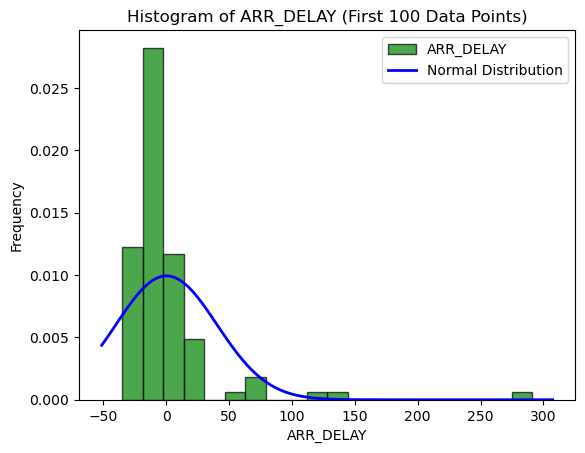

In [172]:
from scipy.stats import kstest, norm
statistic, p_value = kstest(data['ARR_DELAY'].head(100), 'norm')
print("D-Value: ", statistic)
print("P-Value: ", p_value)

import matplotlib.pyplot as plt

plt.hist(data['ARR_DELAY'].head(100), bins=20, edgecolor='black',color = 'green', density=True, alpha=0.7, label='ARR_DELAY')
plt.title('Histogram of ARR_DELAY (First 100 Data Points)')
plt.xlabel('ARR_DELAY')
plt.ylabel('Frequency')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, data['ARR_DELAY'].head(100).mean(), data['ARR_DELAY'].head(100).std())
plt.plot(x, p, color = 'blue', linewidth=2, label='Normal Distribution')

plt.legend()
plt.show()

As per Kolmogorov-Smirnov test it is not normal.

11) Perform a nonlinear transformation of the values and check again for normal distribution

D-Value:  0.161088893276092
P-Value:  0.009817663638925


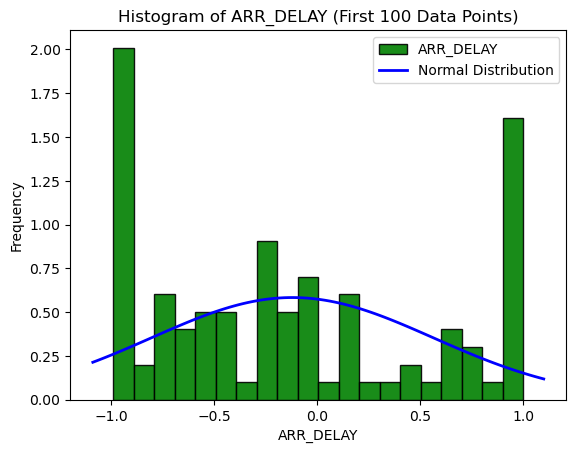

In [173]:
import numpy as np 
flight_data['ARR_DELAY'] = np.cos(data['ARR_DELAY']).astype('float')
                            
statistic, p_value = kstest(flight_data['ARR_DELAY'].head(100), 'norm')
print("D-Value: ", statistic)
print("P-Value: ", p_value)
                            
plt.hist(flight_data['ARR_DELAY'].head(100), bins=20, edgecolor='black',color = 'green', density=True, alpha=0.9, label='ARR_DELAY')
plt.title('Histogram of ARR_DELAY (First 100 Data Points)')
plt.xlabel('ARR_DELAY')
plt.ylabel('Frequency')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, flight_data['ARR_DELAY'].head(100).mean(), flight_data['ARR_DELAY'].head(100).std())
plt.plot(x, p, linewidth=2,color= 'blue', label='Normal Distribution')

plt.legend()
plt.show()                           

12) Use a decision tree for prediction.

In [174]:
display(flight_data.columns)

Index(['OP_CARRIER_FL_NUM', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY',
       'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME',
       'ARR_TIME', 'CANCELLED', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'TOTAL_DELAY', 'DELAY', 'ARR_DELAY'],
      dtype='object')

Accuracy: 0.9529964747356052


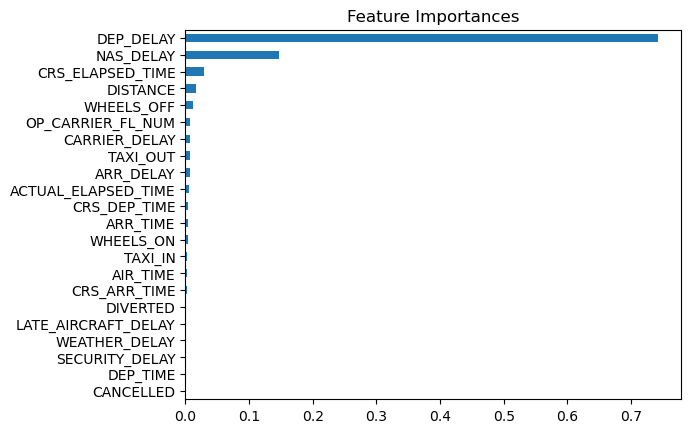

In [175]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import accuracy_score
import seaborn as sns

X = flight_data[['OP_CARRIER_FL_NUM', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME',
       'ARR_TIME', 'CANCELLED', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
         'ARR_DELAY']]
y = flight_data['DELAY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=49)

model = DecisionTreeRegressor(random_state=49)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Visualize feature importances
feature_importances = pd.Series(model.feature_importances_, index = ['OP_CARRIER_FL_NUM', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME',
       'ARR_TIME', 'CANCELLED', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
         'ARR_DELAY'])
feature_importances.sort_values().plot(kind='barh')
plt.title('Feature Importances')
plt.show()

print(model.tree_)

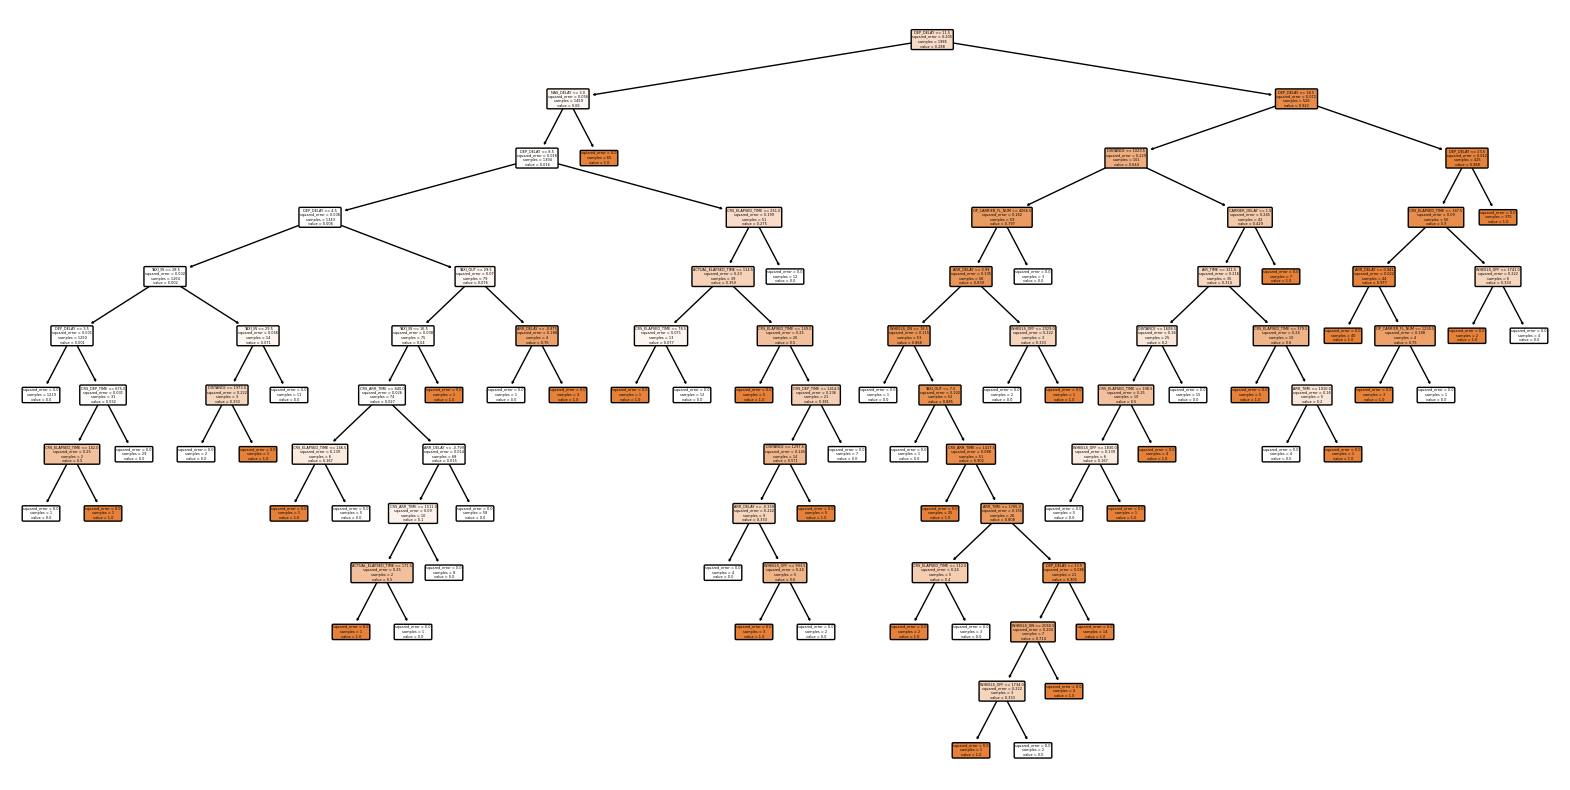

In [176]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns.values.tolist(), class_names=['Not Delayed', 'Delayed'], rounded=True)
plt.show()

13) Print mean squared error and R2 score.

In [177]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')

Mean Squared Error: 0.04700352526439483
R2 Score: 0.7502897636408985


14) To compare different models create a dictionary ofthe models 

· Linear Regression

· Decision Tree

· MLP (MLPRegressor)

In [178]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=49)

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=49),
    'MLP Regressor': MLPRegressor(max_iter=10000, random_state=49)
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    print(f'{model_name} - Mean Squared Error: {mse}')

Linear Regression - Mean Squared Error: 0.173789943968533
Decision Tree - Mean Squared Error: 0.04225352112676056
MLP Regressor - Mean Squared Error: 32.27788192392501


In [179]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=49),
    'MLP Regressor': MLPRegressor(max_iter=10000, random_state=49)
}

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    print(f'{model_name} - Mean Squared Error: {mse}')

Linear Regression - Mean Squared Error: 0.17378994396853353
Decision Tree - Mean Squared Error: 0.04225352112676056
MLP Regressor - Mean Squared Error: 0.04443802566090194


15) Fit all these models and print RMSE train, RMSE test and R2 score for test data as HTML table

In [180]:
from IPython.display import HTML

table_data = []

for model_name, model in models.items():
    
    model.fit(X_train_scaled, y_train)

    y_train_pred = model.predict(X_train_scaled)

    y_test_pred = model.predict(X_test_scaled)

    rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
    r2_train = r2_score(y_train, y_train_pred)

    rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
    r2_test = r2_score(y_test, y_test_pred)

    table_data.append({
        'Model': model_name,
        'RMSE Train': rmse_train,
        'RMSE Test': rmse_test,
        'R2 Score Test': r2_test
    })

result_df = pd.DataFrame(table_data)

html_table = result_df.to_html(index=False)

HTML(html_table)

Model,RMSE Train,RMSE Test,R2 Score Test
Linear Regression,0.279290,0.416881,0.073120
Decision Tree,0.000000,0.205557,0.774648
MLP Regressor,0.156903,0.210803,0.762997


16) Use for the classification of the flight delay Logistic Regression, Decision Tree and Gradient Boosting

In [181]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import  classification_report



features = ['OP_CARRIER_FL_NUM', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME',
            'ARR_TIME', 'CANCELLED', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY',
            'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']

X = flight_data[features]
y = flight_data['DELAY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=49)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

classifiers = {
    'Logistic Regression': LogisticRegression(random_state=49),
    'Decision Tree': DecisionTreeClassifier(random_state=49),
    'Gradient Boosting': GradientBoostingClassifier(random_state=49)
}

table_data = []

for classifier_name, classifier in classifiers.items():
    classifier.fit(X_train_scaled, y_train)

    y_train_pred = classifier.predict(X_train_scaled)

    y_test_pred = classifier.predict(X_test_scaled)

    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)

    table_data.append({
        'Classifier': classifier_name,
        'Accuracy Train': accuracy_train,
        'Accuracy Test': accuracy_test
    })

result_df = pd.DataFrame(table_data)

display(result_df)

,Classifier,Accuracy Train,Accuracy Test
0,Logistic Regression,0.976322,0.978848
1,Decision Tree,1.000000,0.957697
2,Gradient Boosting,0.992443,0.971798


17) Compare the classification methods using AUC, Recall, F1 score

In [182]:
from sklearn.metrics import roc_auc_score, recall_score, f1_score

table_data = []

for classifier_name, classifier in classifiers.items():
    
    classifier.fit(X_train_scaled, y_train)

    
    y_test_pred = classifier.predict(X_test_scaled)

    
    auc = roc_auc_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)

    
    table_data.append({
        'Classifier': classifier_name,
        'AUC': auc,
        'Recall': recall,
        'F1 Score': f1
    })


result_df = pd.DataFrame(table_data)

display(result_df)

,Classifier,AUC,Recall,F1 Score
0,Logistic Regression,0.965702,0.939252,0.957143
1,Decision Tree,0.948470,0.929907,0.917051
2,Gradient Boosting,0.967198,0.957944,0.944700


18) Print the ROC for all models

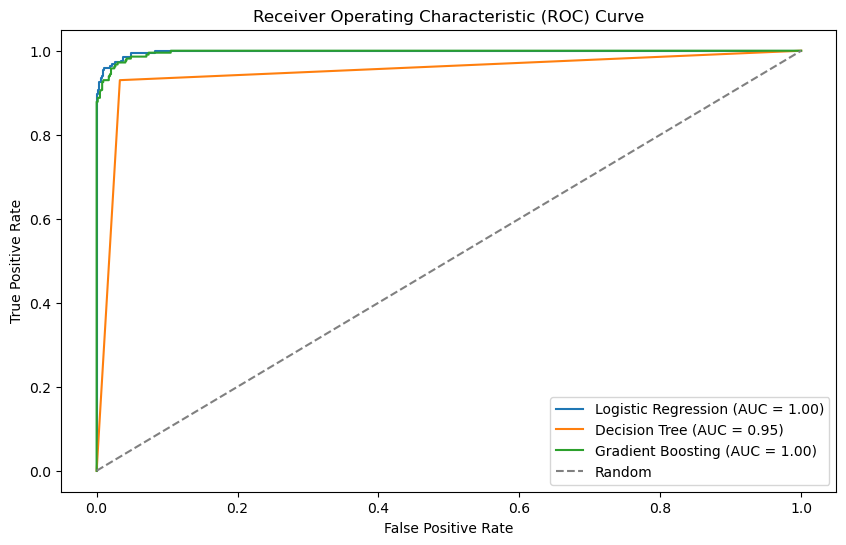

In [183]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 6))
for classifier_name, classifier in classifiers.items():
    # Fit the classifier
    classifier.fit(X_train_scaled, y_train)

    # Predict probabilities on test set
    y_test_probs = classifier.predict_proba(X_test_scaled)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_test_probs)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{classifier_name} (AUC = {roc_auc:.2f})')

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random')

# Set plot properties
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

19) Print the Confusion Matrices for all models 

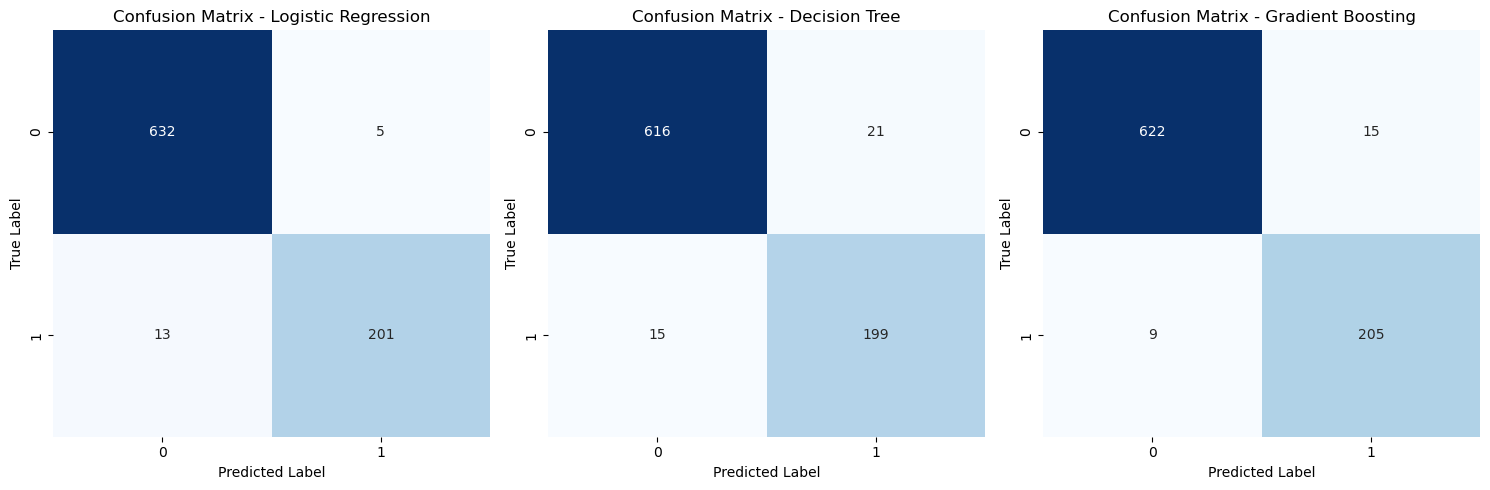

In [184]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(15, 5))
for i, (classifier_name, classifier) in enumerate(classifiers.items(), 1):
    # Fit the classifier
    classifier.fit(X_train_scaled, y_train)

    # Predictions on test set
    y_test_pred = classifier.predict(X_test_scaled)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)

    # Plot confusion matrix
    plt.subplot(1, 3, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {classifier_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

plt.tight_layout()
plt.show()